### Research on Garch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from tqdm import tqdm
from FactorAnalysis import FactorAnalysis
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")

In [2]:
ticker_len = 10

In [3]:
pct_close = pd.read_parquet("db/tw/pdata/close_pct.parquet")
pct_close_w = pct_close.resample("W-FRI").sum()
indexes = pct_close_w.index
tickers = pct_close_w.columns[:ticker_len]
indices = indexes[52:]
forecast = np.zeros((len(indices), len(tickers)))
for index, date in enumerate(tqdm(indices, desc=f"arma model for top {ticker_len}, enumerate by da")):
    pct_train = pct_close_w.loc[indexes[index]:date]
    for i in range(ticker_len):
        series = pct_train[tickers[i]]
        if series.isna().any():
            prediction = 0
            print(tickers[i], "failed at", date)
            continue
            ###### ARIMA ma
        else:
            model = sm.tsa.arima.ARIMA(series, order=(2, 0, 0))
            model_fit = model.fit()
            prediction = model_fit.forecast().values[0]
        forecast[index, i] = prediction
factor = pd.DataFrame(forecast, columns=tickers, index=indices)


arma model for top 10, enumerate by da: 100%|██████████| 78/78 [00:50<00:00,  1.53it/s]


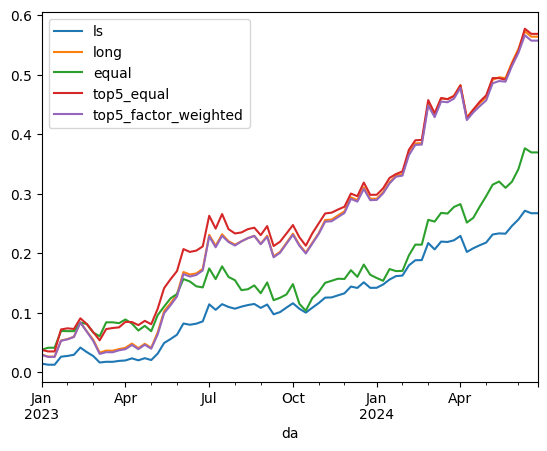

In [14]:
fa = FactorAnalysis()
fa.plot_basic(factor, top=5)

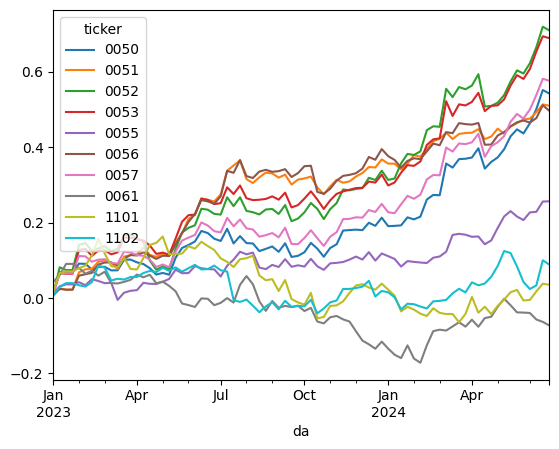

In [18]:
all = pct_close_w[pct_close_w.columns.intersection(factor.columns)].loc['2023-01-01':]
all_cumsum = all.cumsum()
all_cumsum.plot(label=all_cumsum.columns)
plt.show()